In [1]:
import pandas as pd
import pandas as pd
import requests
import io
df=pd.read_csv('apparel-trainval.csv')

In [2]:
from numpy import random,exp,array, dot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
class NeuralNetwork():
    def ini(self, gateInput, gateOutput,i):
        self.gateInput = gateInput
        self.gateOutput = gateOutput
        self.input_shape = (1,784)
        print(self.input_shape)
        self.output_shape = (1,10)
        print((self.output_shape))
        self.layer_nodes = 15 
        self.hidden_layers = i
        self.a = {}


    def initialization(self,):
        self.weights = {}       
        self.weights[0] = (2 * np.random.random((self.input_shape[1], self.layer_nodes)) - 1)*0.01
        for i in range(1,self.hidden_layers):
            self.weights[i] = (2 * np.random.random((self.layer_nodes, self.layer_nodes)) - 1)*0.01
        self.weights[self.hidden_layers] = (2 * np.random.random((self.layer_nodes,self.output_shape[1])) - 1)*0.01

    def sigmoid(self, x):
        return (1/(1+exp(-x)))
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def think(self, x):
        layer1 = self.sigmoid(dot(x, self.weights[0]))
        for i in range(1,self.hidden_layers):
            layer2 = self.sigmoid(dot(layer1, self.weights[i]))
            layer1=layer2
        output = self.sigmoid(dot(layer1, self.weights[self.hidden_layers]))
        return output

    def softmax(self,a):
        mx = np.sum(a,axis = 1,keepdims = True)
        ex = np.divide(a,mx)
        return ex
    
    def train(self, num_steps):
        for x in range(num_steps):
                self.a[0] = self.sigmoid(dot(self.gateInput, self.weights[0]))
                for i in range(1,self.hidden_layers):
                    self.a[i] = self.sigmoid(dot(self.a[i-1], self.weights[i]))
                output = self.sigmoid(dot(self.a[self.hidden_layers-1], self.weights[self.hidden_layers]))
                outputError = -(self.gateOutput - self.softmax(output))

                delta = outputError * self.sigmoid_derivative(output)              
                out_weights_adjustment = dot(self.a[self.hidden_layers-1].T, delta)

                self.weights[self.hidden_layers] -= .001*out_weights_adjustment
                for i in np.arange(self.hidden_layers-1,0,-1):
                    delta = dot(delta, self.weights[i+1].T) * self.sigmoid_derivative(self.a[i])
                    weight_2_adjustment = dot(self.a[i-1].T, delta)
                    x1=self.weights[i]-.001*weight_2_adjustment
                    self.weights[i] = x1
                delta = dot(delta, self.weights[1].T) * self.sigmoid_derivative(self.a[0])
                weight_1_adjustment = dot(self.gateInput.T, delta)
                self.weights[0] -= 0.001*weight_1_adjustment




In [3]:
import copy 
file = df[0:8000]  
X= file.drop(['label'],axis=1)
y =pd.DataFrame(file['label'])
X=(X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
# y_train=pd.concat([y_train,pd.get_dummies(y_train['label'],prefix='label')],axis=1).drop(['label'],axis=1)
y_train=pd.concat([y_train,pd.get_dummies(y_train['label'],prefix='label')],axis=1).drop(['label'],axis=1)



In [4]:
from sklearn.metrics import accuracy_score
numHiddenLayerList = []
errorList = []
for i in range(1,5) :
    X1=copy.deepcopy(X_train)
    y1=copy.deepcopy(y_train)
    neural_network = NeuralNetwork()
    
    neural_network.ini(X1,y1,i)
    neural_network.initialization()
    neural_network.train(300)
    y_valid1=copy.deepcopy(y_test)
    x_valid1=copy.deepcopy(X_test)
    myX=np.array(x_valid1)
    res1=neural_network.think(myX)
    
    
    res=[]
    for val in res1:
        max1=None
        ind=0
        for j in range(10):

            if(max1 is None or val[j]>max1):
                max1=val[j]
                ind=j
        res.append(ind)
    

    print("for Hidden Layer : ",i)
    numHiddenLayerList.append(i)
    print("----------------Accuracy---------------")
    print(accuracy_score(y_valid1,res))
    errorList.append(100-accuracy_score(y_valid1,res)*100)

(1, 784)
(1, 10)
for Hidden Layer :  1
----------------Accuracy---------------
0.821875
(1, 784)
(1, 10)
for Hidden Layer :  2
----------------Accuracy---------------
0.1925
(1, 784)
(1, 10)
for Hidden Layer :  3
----------------Accuracy---------------
0.09375
(1, 784)
(1, 10)
for Hidden Layer :  4
----------------Accuracy---------------
0.09375


Text(0, 0.5, 'Prediction Loss(Error)')

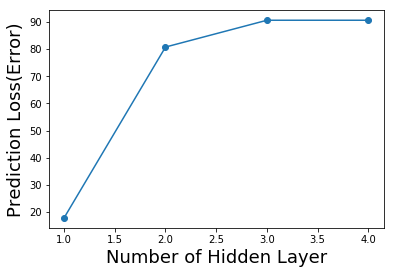

In [8]:
from pylab import *
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(numHiddenLayerList, errorList,marker='o')
ax.set_xlabel("Number of Hidden Layer", fontsize=18)
ax.set_ylabel("Prediction Loss(Error)", fontsize=18)

In [6]:
# from pylab import *
# import matplotlib
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()

# ax.plot(numHiddenLayerList, errorList,marker='o')
# ax.set_xlabel("Number of Hidden Layer", fontsize=18)
# ax.set_ylabel("Prediction Loss(Error)", fontsize=18)

In [7]:
# from pylab import *
# import matplotlib
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()

# ax.plot(numHiddenLayerList, errorList,marker='o')
# ax.set_xlabel("Number of Hidden Layer", fontsize=18)
# ax.set_ylabel("Prediction Loss(Error)", fontsize=18)